# Extracting OpenStreetMap tags using Ohsome API 

OpenStreetMap (OSM) is a global platform that provides free geo-data of the world. OSM is licensed under the Open Data License (ODbL). it contains vector collections comprising of nodes (points), ways (lines) and ways & relations (polygons). Each feature have at least one tag/attribute describing it. 

We explore tags and relations in OSM that can be used to create training data deprivation mapping. 

#### Tags in OSM
1. are there unique building types in deprived areas?
2. are there unique amenity types in deprived areas?
3. which landuse are in deprived areas? 
4. which leisure are in deprived areas?

In [1]:
# Import libraries 
import requests 
import pandas as pd
import json

In [2]:
# load regions
with open(r"E:/IDeaMaps/geojson/acc_urban_extent_2020.geojson") as inf:
    regions_dict = json.load(inf)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/IDeaMaps/geojson/acc_urban_extent_2020.geojson'

In [ ]:
# list of landuse tag to extract
landuse_tags = []
“landuse”, “leisure”, “natural”, “tourism”, and
“waterway”

In [ ]:
URL = 'https://api.ohsome.org/v1/elements/geometry'
data = {
    "bpolys": json.dumps(regions_dict),
    "time": "2021-01-01",
    "filter": "landuse=allotments"
}
response = requests.post(URL, data=data)
display(response)

In [ ]:
with open("E:/IDeaMaps/geojson/acc_allotments", "w") as f:
    json.dump(response.json(), f)

# Word cloud 

In [4]:
! pip install wordcloud

In [15]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv('./data/poi_others_only.csv')
print(data.head())

   FID    osm_id  code      fclass                    name
0    0  30729986  2001      police  Airport Police Station
1    1  30730004  2004    post_box                     DHL
2    2  30730082  2401       hotel   Eastoment Guest Lodge
3    3  30730090  2301  restaurant              Home Touch
4    4  30772867  2301  restaurant          Captain Hook's


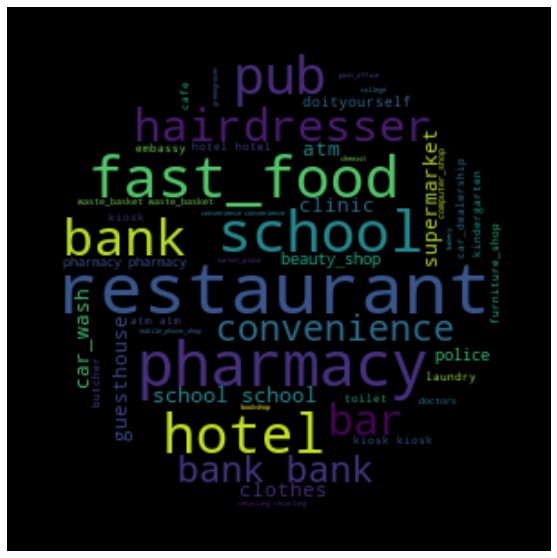

In [21]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

text = " ".join(i for i in data.fclass)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask=mask, max_font_size=40).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
data = pd.read_csv('./data/poi_slum_only.csv')
print(data.head())

   FID      osm_id  code      fclass                          name
0   82  1212326493  2302   fast_food     Walkers extra large pizza
1  114  1270558192  2404  guesthouse  Quenn Victoria's Guest House
2  117  1270558809  2120     doctors   Sape Agbo Memorial Hospital
3  118  1270558824  2401       hotel                   Ebony Hotel
4  126  1276372938  2601        bank                       Ecobank


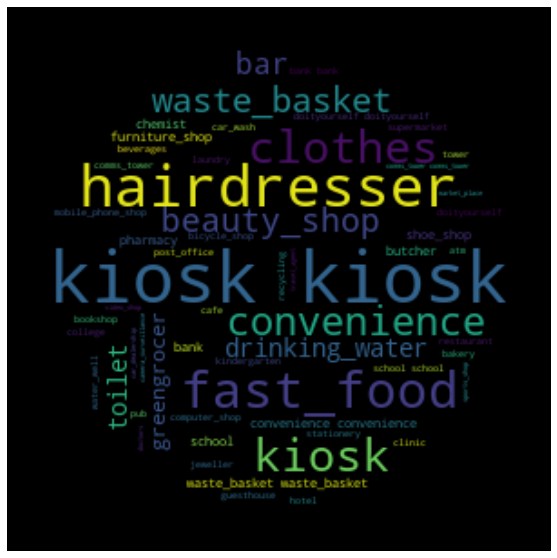

In [23]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

text = " ".join(i for i in data.fclass)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask=mask, max_font_size=40).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()